In [4]:
# Library

from skimage.io import imread,imsave,imshow
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm



# 1)  Folder details

*  testing_data : I guess it's just to plot images and see few things
*  training_data -> folder with images to train the neural network. 
All = Acute lymphoblastic leukemia
*  validation_data -> folder with images to test the model


### First let's write down each pach usefull for accessing data 

In [5]:
path_t = "C:\\Users\\cossa\\Documents\\ULB\\MA1\\Projet\\ProjetMA1\\C-NMC_Leukemia\\training_data\\"
#hem cells = Human Epidermal Melanocytes : Le mélanocyte est une cellule qui pigmente la peau
path_t_fold_0_hem = path_t + "fold_0\\hem\\"
path_t_fold_1_hem = path_t + "fold_1\\hem\\"
path_t_fold_2_hem = path_t + "fold_2\\hem\\"
#all cells = Acute lymphoblastic leukemia : 
path_t_fold_0_all = path_t + "fold_0\\all\\"
path_t_fold_1_all = path_t + "fold_1\\all\\"
path_t_fold_2_all = path_t + "fold_2\\all\\"

### Here let's write some usefull functions

In [6]:
import os
def readImFolder(path_folder):
    x= []
    for file in os.listdir(path_folder):
        seq = imread(path_folder+file)
        x.append(seq)
    return x
def show2Images(im1, im2, title_1, title_2):
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1).set_title(title_1)
    plt.imshow(im1, label = "")
    plt.subplot(1,2,2).set_title(title_2)
    plt.imshow(im2)

### Let's plot some images to try to see some differences between hem and all cells

In [13]:
hem_plot = readImFolder(path_t_fold_0_hem) 
all_plot = readImFolder(path_t_fold_0_all)

In [27]:
hem_plot = np.array(hem_plot)
all_plot = np.array(all_plot)
n = 15
print ("Dim_hem : ",hem_plot.shape, "Dim all : ",all_plot.shape)
n_loop = (np.random.rand(n) * min(hem_plot.shape[0], all_plot.shape[0])).astype(np.int)

Dim_hem :  (1130, 450, 450, 3) Dim all :  (2397, 450, 450, 3)


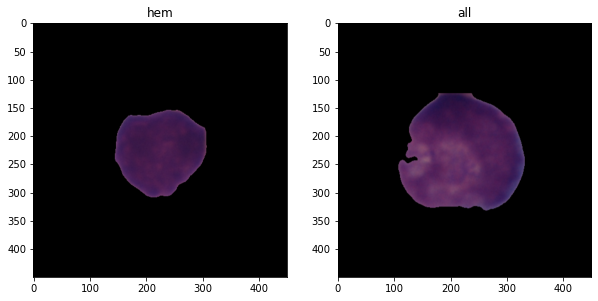

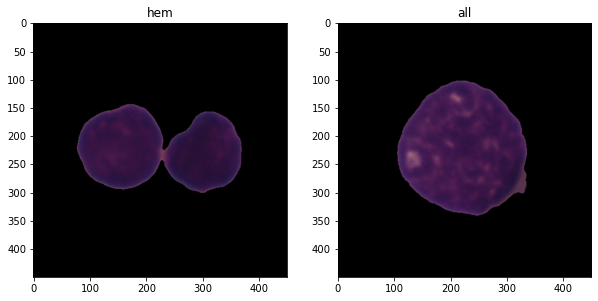

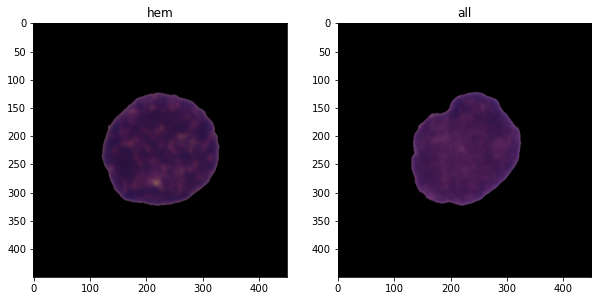

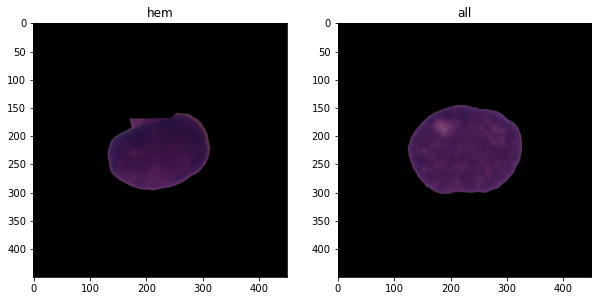

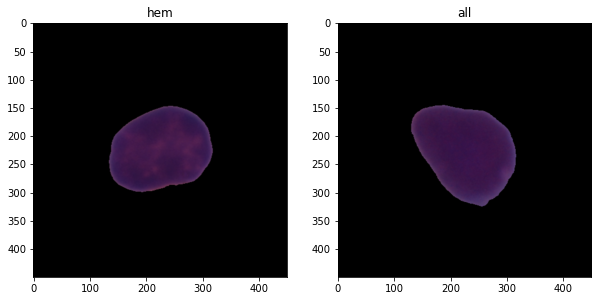

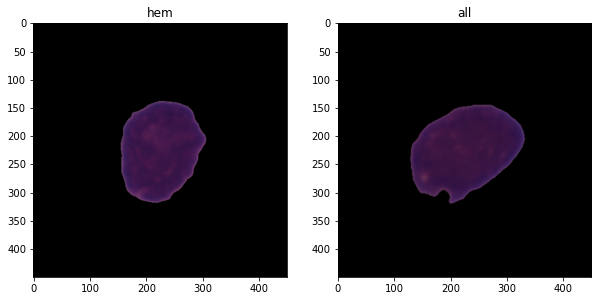

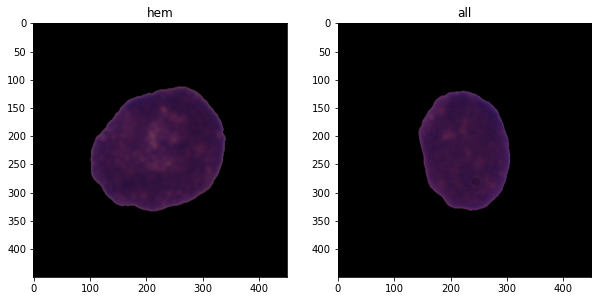

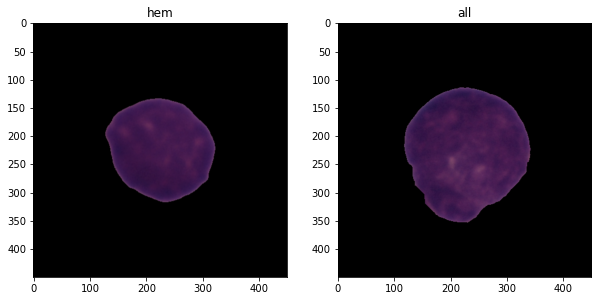

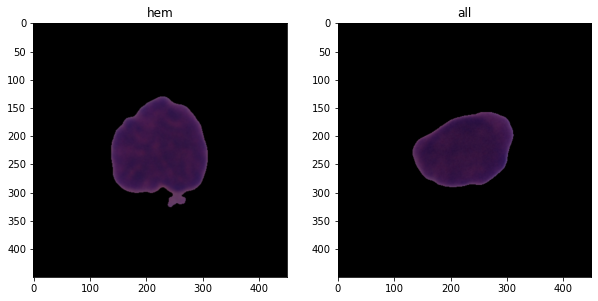

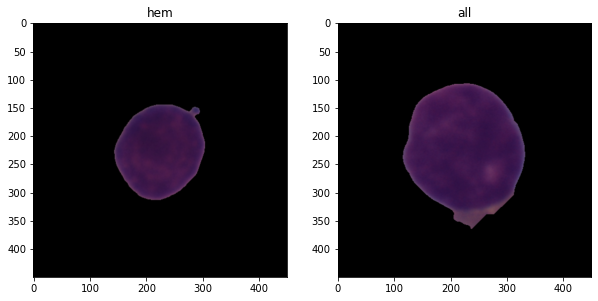

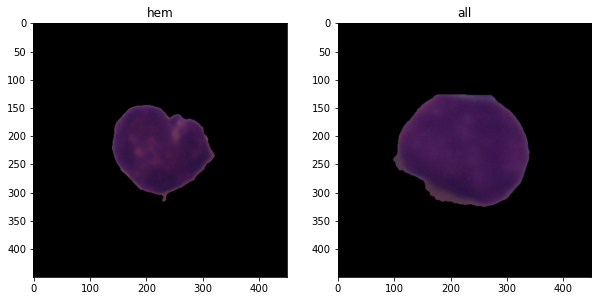

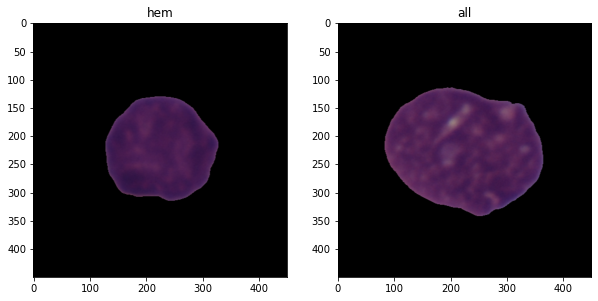

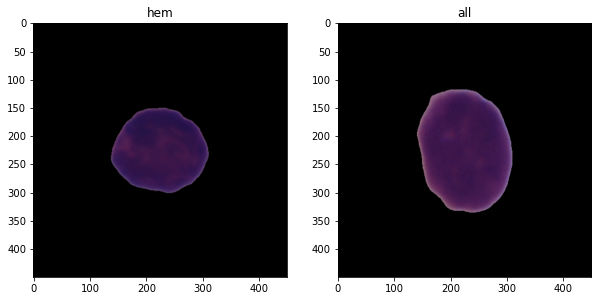

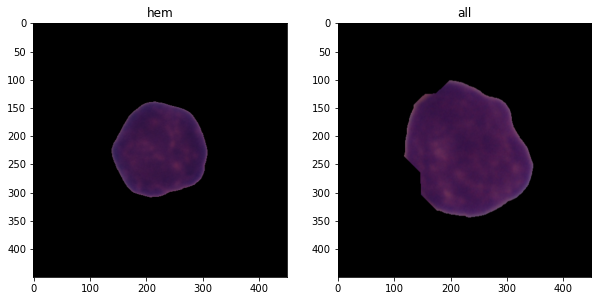

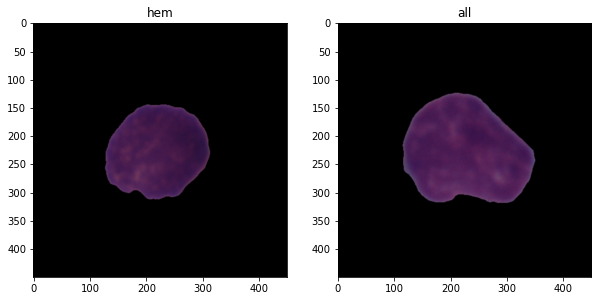

In [30]:
for x in range (n):
    show2Images(hem_plot[n_loop[x],:,:,:],all_plot[n_loop[x],:,:,:],"hem", "all")


# 2) Histogramme 

### Here, let's try to use histogramme to try to see the difference with number, let's right some usefull functions first

In [4]:
def verify_density(hist_flatten) :
    y= 0
    for x in range(hist_flatten.size) :
        y = y + hist_flatten[x]
    print('verify',y)
    
    
    
def ret_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))
    return hist


def show_hist(ima1,ima2, title_1, title_2):
    nh_r_1 = ret_hist(ima1[:,:,0])
    nh_g_1 = ret_hist(ima1[:,:,1])
    nh_b_1 = ret_hist(ima1[:,:,2])
    nh_r_2 = ret_hist(ima2[:,:,0])
    nh_g_2 = ret_hist(ima2[:,:,1])
    nh_b_2 = ret_hist(ima2[:,:,2])
    
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1).set_title(title_1)
    plt.imshow(ima1)
    plt.subplot(1,2,2).set_title(title_2)
    plt.imshow(ima2)
    
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_r_1, color = 'red')
    plt.subplot(1,2,2)
    plt.plot(nh_r_2, color = 'red')
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_g_1, color = 'green')
    plt.subplot(1,2,2)
    plt.plot(nh_g_2, color = 'green')
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_b_1, color = 'blue')
    plt.subplot(1,2,2)
    plt.plot(nh_b_2, color = 'blue')

    
def ret_hist_no_black(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))
    hist[0] = 0
    hist[1] = 0
    hist[2] = 0
    return hist
def show_hist_no_black(ima1,ima2, title_1, title_2):
    nh_r_1 = ret_hist_no_black(ima1[:,:,0])
    nh_g_1 = ret_hist_no_black(ima1[:,:,1])
    nh_b_1 = ret_hist_no_black(ima1[:,:,2])
    nh_r_2 = ret_hist_no_black(ima2[:,:,0])
    nh_g_2 = ret_hist_no_black(ima2[:,:,1])
    nh_b_2 = ret_hist_no_black(ima2[:,:,2])
    
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1).set_title(title_1)
    plt.imshow(ima1)
    plt.subplot(1,2,2).set_title(title_2)
    plt.imshow(ima2)
    
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_r_1, color = 'red')
    plt.subplot(1,2,2)
    plt.plot(nh_r_2, color = 'red')
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_g_1, color = 'green')
    plt.subplot(1,2,2)
    plt.plot(nh_g_2, color = 'green')
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.plot(nh_b_1, color = 'blue')
    plt.subplot(1,2,2)
    plt.plot(nh_b_2, color = 'blue')    
    
def readImFolderList(path_folder):
    x= []
    for n in range(len(path_folder)):
        for file in os.listdir(path_folder[n]):
            seq = imread(path_folder[n]+file)
            x.append(seq)
    return x
def computeAverage(im):
    average_im= np.zeros(3)
    print(im.shape[0])
    for x in range(im.shape[0]):
        average_im = average_im + im[x]
    return average_im/im.shape[0]

def computeAverageFromFolder(path_folder):
    average_im= np.zeros(3)
    temoin = 0
    for n in range(len(path_folder)):
        for file in os.listdir(path_folder[n]):
            temoin = temoin + 1
            seq2 = imread(path_folder[n]+file)/255
            average_im = average_im + seq2
    return average_im/temoin

To display the histogramme, we gonna need to use the average image, so let's download all images from each folder and compute the average image

In [16]:
path_hem =  [path_t_fold_0_hem,path_t_fold_1_hem,path_t_fold_2_hem]
all_plot =  [path_t_fold_0_all, path_t_fold_0_all, path_t_fold_0_all]

hem_array = np.array(readImFolderList(path_hem))
all_array = np.array(readImFolderList(all_plot))

print(hem_array.shape, all_array.shape)

import sys
np.set_printoptions(threshold=sys.maxsize)
average_hem = computeAverage(hem_array)
average_all = computeAverage(all_array)
show2Images(computeAverage(hem_array),computeAverage(all_array), "hem", "all")

In [ ]:
#ERROR I tried to load every image in array but it just overflows me memory... It was not possible. 

In [79]:
average_hem = computeAverageFromFolder(path_hem)
average_all = computeAverageFromFolder(all_plot)

(450, 450, 3) (450, 450, 3)


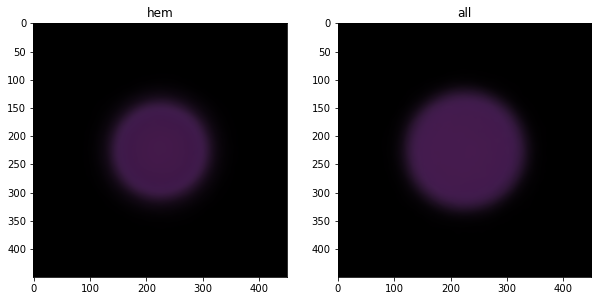

In [80]:
print(average_hem.shape, average_all.shape)
show2Images(average_hem,average_all, "hem", "all")

### We can see that the all cell looks bigger in average than the hem. So his area is bigger. So maybe we could the area as input.
## Let's plot histogram

In [82]:
average_hem_255= (average_hem * 255).astype(int)
average_all_255 =(average_all *255).astype(int)

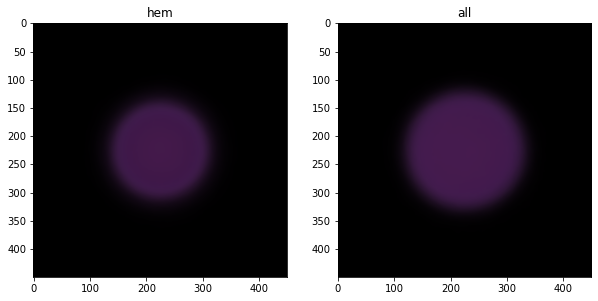

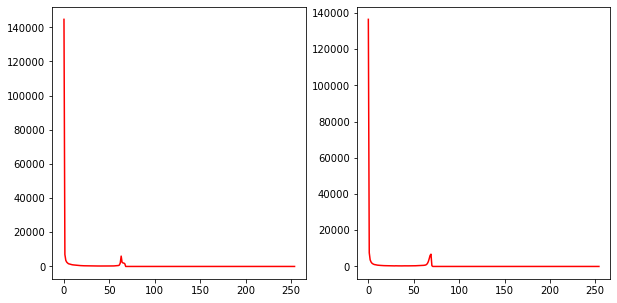

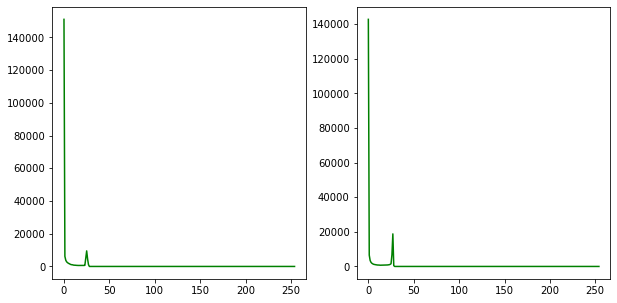

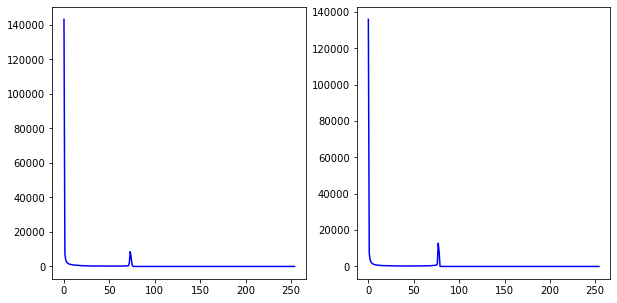

In [83]:
show_hist(average_hem_255, average_all_255, "hem", "all")

In [ ]:
# Seems logic than all cell has more pixel different from black as it is bigger
# Now, let's remove the black pixel

In [84]:
hist = ret_hist(average_all_255[:,:,0])
print(hist)
max([x for x in hist if x < 7000])

[136511   7544   3634   2442   1792   1432   1177   1011    940    802
    724    661    613    579    537    525    489    451    459    421
    409    399    387    389    375    342    366    328    350    312
    354    327    327    320    308    309    309    305    327    315
    337    320    329    313    325    326    351    333    335    366
    360    370    382    404    413    418    449    477    504    539
    554    610    686    776   1036   1593   2574   4191   6049   6765
    413      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

6765

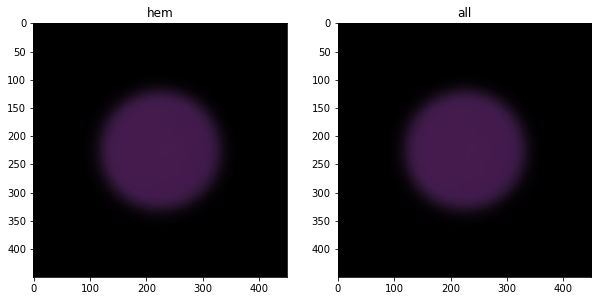

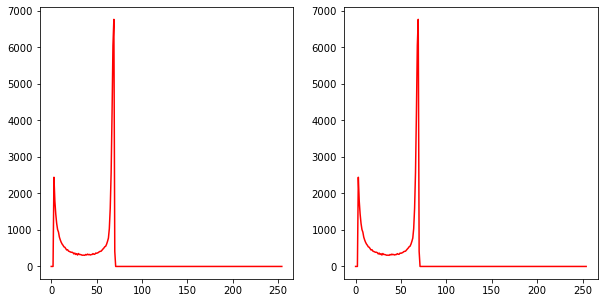

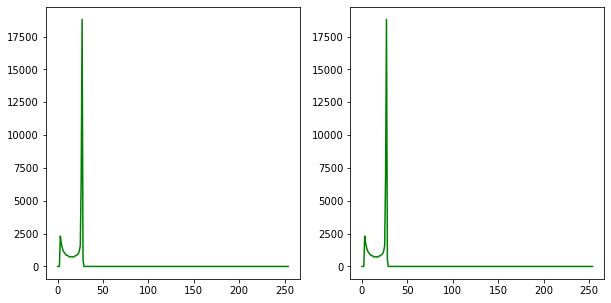

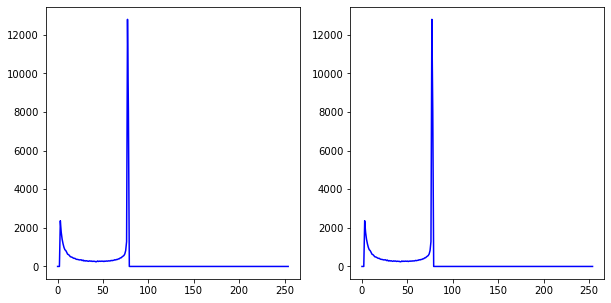

In [85]:
show_hist_no_black(average_all_255, average_all_255, "hem", "all")

In [86]:
nh_r_1 = ret_hist_no_black(average_all_255[:,:,0])
nh_g_1 = ret_hist_no_black(average_all_255[:,:,1])
nh_b_1 = ret_hist_no_black(average_all_255[:,:,2])
nh_r_2 = ret_hist_no_black(average_all_255[:,:,0])
nh_g_2 = ret_hist_no_black(average_all_255[:,:,1])
nh_b_2 = ret_hist_no_black(average_all_255[:,:,2])

max_r_1 = max(nh_r_1)
max_r_2 = max(nh_r_2)
max_g_1 = max(nh_g_1)
max_g_2 = max(nh_g_2)
max_b_1 = max(nh_b_1)
max_b_2 = max(nh_b_2)


print("nh_r_1",max_r_1, "nh_r_2",max_r_2)
print("nh_g_1",max_g_1, "nh_g_2",max_g_2)
print("nh_b_1",max_b_1, "nh_b_2",max_b_2)

nh_r_1 6765 nh_r_2 6765
nh_g_1 18808 nh_g_2 18808
nh_b_1 12799 nh_b_2 12799


In [87]:
pixel_r_1 = nh_r_1.tolist().index(max_r_1)
pixel_r_2 = nh_r_2.tolist().index(max_r_2)
pixel_g_1 = nh_g_1.tolist().index(max_g_1)
pixel_g_2 = nh_g_2.tolist().index(max_g_2)
pixel_b_1 = nh_b_1.tolist().index(max_b_1)
pixel_b_2 = nh_b_2.tolist().index(max_b_2)

print("pixel_r_1", pixel_r_1, "pixel_r_2",pixel_r_2)
print("pixel_g_1", pixel_g_1, "pixel_g_2",pixel_g_2)
print("pixel_b_1", pixel_b_1, "pixel_b_2",pixel_b_2)

pixel_r_1 69 pixel_r_2 69
pixel_g_1 27 pixel_g_2 27
pixel_b_1 77 pixel_b_2 77


# Reducing image size 

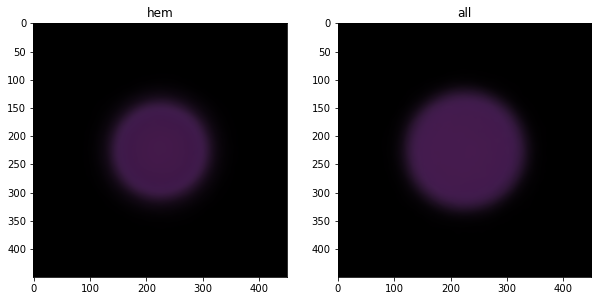

In [88]:
show2Images(average_hem,average_all, "hem", "all")

We can see that most of the image don't use the full resolution. Let's try to find the maximum border to reduce the image size

In [90]:
def ret_non_zero_from_begin(seq):
    for x in range(len(seq)):
        if (seq[x] > 0):
            return int(x)
        else :
            if (x == len(seq)-1):
                return int(x)
def ret_non_zero_from_end(seq):
    for x in range(len(seq)-1,0,-1):
        if (seq[x] > 0):
            return int(x)
        else :
            if (x == 1):
                return int(x)

In [91]:
border_begin = np.zeros(450)
border_end = np.zeros(450)

for x in range (len(average_all)):
    #begin
    R = average_all[x,:,0]
    G = average_all[x,:,1]
    B = average_all[x,:,2]
    b_R = ret_non_zero_from_begin(R)
    b_G = ret_non_zero_from_begin(G)
    b_B = ret_non_zero_from_begin(B)
    
    b_p = max (b_R, b_G, b_B)
    border_begin[x] =b_p
    
    e_R = ret_non_zero_from_end(R)
    e_G = ret_non_zero_from_end(G)
    e_B = ret_non_zero_from_end(B)
    
    e_p = max (e_R, e_G,e_B)
    border_end[x] = e_p

#Let's find left border 

left_border = min(border_begin) #output = 31
print('left border', left_border)
#Let's find right border

right_border = max(border_end) #output = 565
print ('right border', right_border)


#Let's find the upper border

u_b = -1
u_e = -1
for x in range(len(border_begin)):
    if (border_begin[x] != 449):
        u_b = x
        

for x in range(len(border_end)):
    if (border_end[x] != 1):
        u_e = x
        
upper_border = max(u_b, u_e)
print ('upper border', upper_border) #ouput is 531

#Let's find the lower border

l_b = -1
l_e = -1

for x in range(len(border_begin)-1,0,-1):
    if (border_begin[x] != 599):
        l_b = x
        

for x in range(len(border_end)-1,0,-1):
    if (border_end[x] != 1):
        l_e = x
        
lower_border = max(l_b, l_e)
print ('lower border', lower_border) #output is 78

left border 0.0
right border 448.0
upper border 449
lower border 1


In [98]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(average_all[:,445:450,0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000000

# Let's try to use the NeuralNetwork

In [7]:
%pylab inline
#http://www.rricard.me/machine/learning/generative/adversarial/networks/keras/tensorflow/2017/04/05/gans-part2.html

import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, Conv1D, Dropout, ReLU, Flatten, Input, BatchNormalization, Reshape, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import sigmoid, tanh
from keras.losses import binary_crossentropy, mse
from keras.optimizers import SGD, Adam


from keras.utils import to_categorical


from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


Populating the interactive namespace from numpy and matplotlib


C:\Users\cossa\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['imsave', 'imread', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [8]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model= Sequential()
model.add(Conv2D(32, (5,5), input_shape=(450,450,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (5,5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (5,5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu')) #replace relu by sigmoid
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
# model.compile(optimizer=Adam(1e-4), loss=binary_crossentropy, metrics=["acc"])
model.compile(optimizer=sgd, loss=binary_crossentropy, metrics=["acc"])

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 446, 446, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 223, 223, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 223, 223, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 219, 219, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 128)     2

### Training

In [9]:
hem_plot = np.array(readImFolder(path_t_fold_0_hem))
all_plot = np.array(readImFolder(path_t_fold_0_all))

In [10]:
print(hem_plot.shape)


(1130, 450, 450, 3)


In [10]:
# hem_plot = hem_plot/255
# all_plot = all_plot/255
#taking too much memory

In [11]:
print(all_plot.shape)
print(hem_plot.shape)

y_all = np.ones(all_plot.shape[0]) #label all = 1 
y_hem = np.zeros(hem_plot.shape[0])


x = np.concatenate((all_plot,hem_plot))
y = np.concatenate((y_all, y_hem))

print(x.shape)
print(y.shape)


(2397, 450, 450, 3)
(1130, 450, 450, 3)
(3527, 450, 450, 3)
(3527,)


In [ ]:
for m in range (10):
    idx= np.random.randint(low=0,high=x.shape[0],size=300)
    x_train = x[idx]/255
    y_train = y[idx]/255
    model.fit(x_train, y_train , batch_size=15, epochs=1)

18/20 [==========================>...] - ETA: 12s - loss: 0.0194 - acc: 0.3519

In [ ]:
def readImFolderLowMemory(path_folder):
    x= []
    temoin = 0
    for file in os.listdir(path_folder):
        temoin = temoin + 1
        seq = imread(path_folder+file)
        x.append(seq)
        if (temoin ==50):
            return x
    return x

In [59]:
all_plot_test = np.array(readImFolderLowMemory(path_t_fold_1_all))/255
hem_plot_test = np.array(readImFolderLowMemory(path_t_fold_1_hem))/255

In [91]:
y_all_test= model.predict(all_plot_test)
y_hem_test= model.predict(hem_plot_test)

In [92]:
#PRINT
##VALUE IS LOW BECAUSE ALL INPUTS ARE BETWEEN 0 AND 1 (pixel input) but as the pixel are mostly black almost all input data is 
#0 so...


#ALL
import sys
np.set_printoptions(threshold=sys.maxsize)
print (np.sum(y_all_test)/len(y_all_test)) #96% acc
print(y_all_test)



0.32433696746826174
[[0.33715016]
 [0.33572388]
 [0.35977787]
 [0.30698472]
 [0.36057532]
 [0.30654523]
 [0.3762445 ]
 [0.3028303 ]
 [0.28117317]
 [0.28626266]
 [0.3286159 ]
 [0.33527422]
 [0.3331786 ]
 [0.36963922]
 [0.3420551 ]
 [0.2662533 ]
 [0.33634526]
 [0.332951  ]
 [0.36691865]
 [0.28961545]
 [0.30505186]
 [0.35577616]
 [0.3495742 ]
 [0.30647036]
 [0.2931185 ]
 [0.37218451]
 [0.32697928]
 [0.340591  ]
 [0.3797879 ]
 [0.2565757 ]
 [0.3519368 ]
 [0.36009192]
 [0.26282182]
 [0.26790458]
 [0.33020934]
 [0.3113708 ]
 [0.36610317]
 [0.36697787]
 [0.26233757]
 [0.30023408]
 [0.2663949 ]
 [0.30394894]
 [0.3046161 ]
 [0.36368185]
 [0.319071  ]
 [0.31797862]
 [0.3108291 ]
 [0.2960779 ]
 [0.34660137]
 [0.36743563]]


In [93]:
#PRINT

#ALL
import sys
np.set_printoptions(threshold=sys.maxsize)
print (np.sum(y_hem_test)/len(y_hem_test)) #96% acc
print(y_hem_test)



0.24806322097778322
[[0.22497451]
 [0.22834909]
 [0.20187494]
 [0.22295421]
 [0.24270844]
 [0.22583646]
 [0.21465224]
 [0.21682036]
 [0.27740026]
 [0.2323938 ]
 [0.21844068]
 [0.24156335]
 [0.3450545 ]
 [0.22968909]
 [0.23258305]
 [0.2215425 ]
 [0.23562548]
 [0.22233933]
 [0.21746233]
 [0.20850104]
 [0.25441933]
 [0.31076753]
 [0.21794924]
 [0.23156378]
 [0.29550952]
 [0.24297872]
 [0.2084285 ]
 [0.24693802]
 [0.23670289]
 [0.22811413]
 [0.23992255]
 [0.21989915]
 [0.24489298]
 [0.23986158]
 [0.21338177]
 [0.3234418 ]
 [0.21638227]
 [0.37857887]
 [0.22547406]
 [0.24025327]
 [0.35121745]
 [0.35471952]
 [0.24349603]
 [0.24270731]
 [0.25345486]
 [0.22276786]
 [0.2235333 ]
 [0.30742082]
 [0.23955277]
 [0.28806633]]


In [107]:
treshhold = (np.sum(y_all_test)/len(y_all_test) +np.sum(y_hem_test)/len(y_hem_test))/2

temoin_hem =0
for n in range(len(y_hem_test)):
    if (y_hem_test[n] < treshhold):
        temoin_hem = temoin_hem +1
print ((temoin_hem/len(y_hem_test))*100)
    
temoin_all =0
for n in range(len(y_all_test)):
    if (y_all_test[n] > treshhold):
        temoin_all = temoin_all +1
print ((temoin_all/len(y_all_test))*100)
    

82.0
86.0


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16354365450579560674
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1579058850068725767
physical_device_desc: "device: XLA_CPU device"
]
